A comparative study of various iterative methods is done and results are discussed

Solving the poission equation is a square of unit length using:
1. Jacobi method
2. Gauss - Seidel
3. SOR (successive over-relaxation)
4. RBPGS
5. ADI ( alternating-direction implicit)

Comparing the residual plots for all the method and discussion about the convergence.Also error contours of $\phi$ for each method are analysed

\begin{equation}
  \nabla^2 u(\phi) = S(\phi),
\end{equation}

$\begin{aligned} S_{\phi}=& 2 \sinh \left[10\left(x-\frac{1}{2}\right)\right]+40\left(x-\frac{1}{2}\right) \cosh \left[10\left(x-\frac{1}{2}\right)\right] \\ &+100\left(x-\frac{1}{2}\right)^{2} \sinh \left[10\left(x-\frac{1}{2}\right)\right] \\ &+2 \sinh \left[10\left(y-\frac{1}{2}\right)\right]+40\left(y-\frac{1}{2}\right) \cosh \left[10\left(y-\frac{1}{2}\right)\right] \\ &+100\left(y-\frac{1}{2}\right)^{2} \sinh \left[10\left(y-\frac{1}{2}\right)\right] \\ &+4\left(x^{2}+y^{2}\right) e^{2 x y} \end{aligned}$

The boundary conditions are as follows:

$\phi(0, y)=\frac{1}{4} \sinh (-5)+\left(y-\frac{1}{2}\right)^{2} \sinh \left[10\left(y-\frac{1}{2}\right)\right]+1$
$\phi(1, y)=\frac{1}{4} \sinh (5)+\left(y-\frac{1}{2}\right)^{2} \sinh \left[10\left(y-\frac{1}{2}\right)\right]+e^{2 y}$
$\phi(x, 0)=\frac{1}{4} \sinh (-5)+\left(x-\frac{1}{2}\right)^{2} \sinh \left[10\left(x-\frac{1}{2}\right)\right]+1$
$\phi(x, 1)=\frac{1}{4} \sinh (5)+\left(x-\frac{1}{2}\right)^{2} \sinh \left[10\left(x-\frac{1}{2}\right)\right]+e^{2 x}$

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math  as m
from numpy import linalg as al


# jacobi

total number of itetrations: 4101


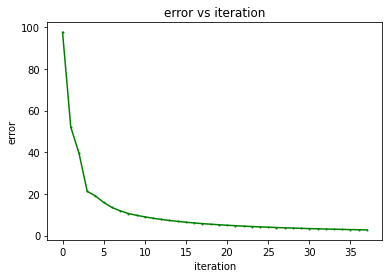

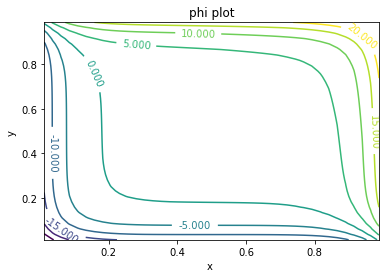

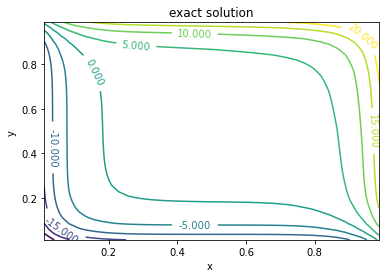

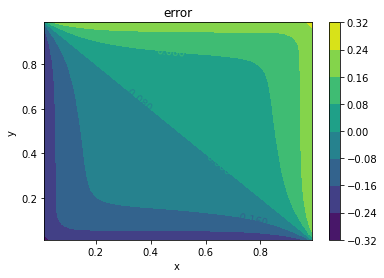

In [48]:
xn = 41        # internal grids
yn = 41        # internal grids

xnp2 = xn+2    # including ghost cells
ynp2 = yn+2    # including ghost cells
dh = 1/xn      # distance between each grid points

phin = np.zeros(shape=(xnp2,xnp2),dtype=float)           # initializing new phi
phi = np.zeros(shape=(xnp2,xnp2),dtype=float)            # initializing old phi
error = np.zeros(shape=(xnp2,xnp2),dtype=float)          # initializing error matrix
p = np.zeros(shape=(xnp2-2,xnp2-2),dtype=float)          # initializing exact solution
tol = 0.000001    #tolerance
e = 1             # initializing error value
k =0              # initializing iteration value
erj41 = []        # initializing error list

b0x = lambda y :(0.25)*m.sinh(-5) + ((y-0.5)**2)*m.sinh(10*(y-0.5)) +1        # boundary condition at x =0
b1x = lambda y :(0.25)*m.sinh(5) + ((y-0.5)**2)*m.sinh(10*(y-0.5)) +m.exp(2*y) # boundary condition at x =1
b0y = lambda x :(0.25)*m.sinh(-5) + ((x-0.5)**2)*m.sinh(10*(x-0.5)) +1         # boundary condition at y = 0
b1y = lambda x :(0.25)*m.sinh(5) + ((x-0.5)**2)*m.sinh(10*(x-0.5)) +m.exp(2*x)  # boundary condition at y =1
#finding the s function
g = lambda x,y:2*m.sinh(10*(x-0.5)) + 40* (x-0.5)*m.cosh(10*(x-0.5)) \
                + 100*((x-0.5)**2)*m.sinh(10*(x-0.5)) \
                    + 2*m.sinh(10*(y-0.5))+40*(y-0.5)*m.cosh(10*(y-0.5)) \
                        + 100*((y-0.5)**2)*m.sinh(10*(y-0.5)) + 4*(x**2 + y**2)*m.exp(2*x*y)
while e>tol:       
    for j in range(1,xnp2-1):
        for i in range(1,xnp2-1):
            # finding the x and y values at every grid points 
            #here the value of first grid is point is 0.5 times the dh and the rest of them are dh distance from the previous node
            x = 0.5*dh + (i-1)*dh        
            y = 0.5*dh + (j-1)*dh
            #  jacobi equation to solve the grid
            phin[i,j] = (g(x,y)- (phi[i,j-1]/dh**2 + phi[i-1,j]/dh**2 + phi[i+1,j]/dh**2 + phi[i,j+1]/dh**2))/(-2*(2/dh**2))

    for a in range(1,xnp2-1):
        #updating the ghost cells
        phin[a,0] = 2*b0x(0.5*dh + (a-1)*dh) - phi[a,1]
        phin[a,xn+1] = 2*b1x(0.5*dh + (a-1)*dh) - phi[a,xn]
        
    for b in range(1,xnp2-1):
        #updating the ghost cells
        phin[0,b] = 2*b0y(0.5*dh + (b-1)*dh) - phi[1,b]
        phin[xn+1,b] = 2*b1y(0.5*dh + (b-1)*dh) - phi[xn,b]
     # finding the error using the L2 norm   
    e = al.norm(phi[1:xnp2-1,1:ynp2-1]-phin[1:xnp2-1,1:ynp2-1],2)
    # storing the error values
    erj41.append(e)    
    k = k+1   
    # storing the phin in phi to use in the next iteration
    phi = np.copy(phin)  
print('total number of itetrations:',k)    
     

#iteration plot
r = list(range(0,xn-3))  
plt.plot(r, ergs41[2:xn-1], color='green', marker='o', markerfacecolor='blue', markersize=1) 
plt.title('error vs iteration')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()   
 

# phi plot
xlist = np.linspace(0.5*dh, 1.0-1/(xn*2), xn)
ylist = np.linspace(0.5*dh, 1.0-1/(yn*2), yn)
x, y = np.meshgrid(xlist, ylist)
Z =phin[1:xnp2-1,1:ynp2-1]
lev = np.arange(-25,25,5)
fig,ax=plt.subplots(1,1)
phiplot = ax.contour(x, y, Z,levels=lev)
ax.clabel(phiplot, inline=True,fontsize=10)
ax.set_title('phi plot')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()        



# real value polt
p =( (x-0.5)**2 * np.sinh(10*(x-0.5))+(y-0.5)**2 * np.sinh(10*(y-0.5))+np.exp(2*x*y))
fig,ax=plt.subplots(1,1)
lev = np.arange(-25,25,5)
real = ax.contour(x, y, p,levels=lev)
ax.clabel(real, inline=True,fontsize=10)
plt.title('exact solution')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()   



#error plot
erro = p- phin[1:xnp2-1,1:ynp2-1]
fig,ax=plt.subplots(1,1)
lev = np.arange(-25,25)
errorplot = ax.contourf(x, y, erro)
fig.colorbar(errorplot)

ax.clabel(errorplot, inline=True,fontsize=10)
plt.title('error')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()


# gauss seidel

total number of iterations:  2204


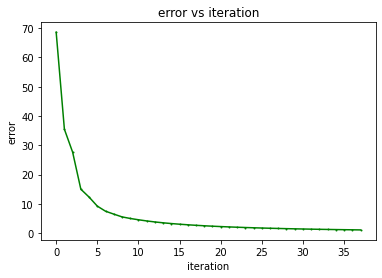

2204


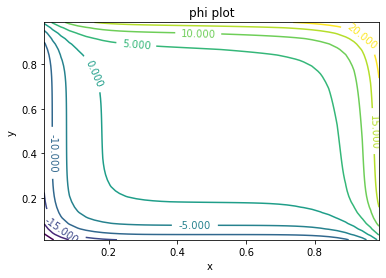

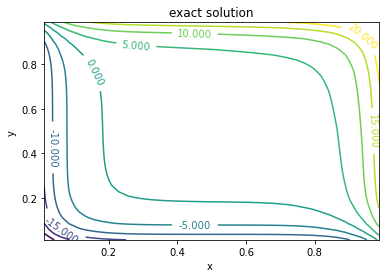

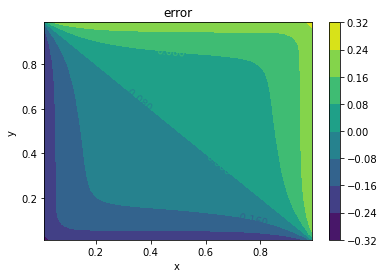

In [49]:
xn = 41        # internal grids
yn = 41        # internal grids

xnp2 = xn+2    # including ghost cells
ynp2 = yn+2    # including ghost cells
dh = 1/xn      # distance between each grid points

phin = np.zeros(shape=(xnp2,xnp2),dtype=float)           # initializing new phi
phi = np.zeros(shape=(xnp2,xnp2),dtype=float)            # initializing old phi
error = np.zeros(shape=(xnp2,xnp2),dtype=float)          # initializing error matrix
p = np.zeros(shape=(xnp2-2,xnp2-2),dtype=float)          # initializing exact solution
tol = 0.000001    #tolerance
e = 1             # initializing error value
k =0              # initializing iteration value
ergs41 = []       # initializing error list

b0x = lambda y :(0.25)*m.sinh(-5) + ((y-0.5)**2)*m.sinh(10*(y-0.5)) +1        # boundary condition at x =0
b1x = lambda y :(0.25)*m.sinh(5) + ((y-0.5)**2)*m.sinh(10*(y-0.5)) +m.exp(2*y) # boundary condition at x =1
b0y = lambda x :(0.25)*m.sinh(-5) + ((x-0.5)**2)*m.sinh(10*(x-0.5)) +1         # boundary condition at y = 0
b1y = lambda x :(0.25)*m.sinh(5) + ((x-0.5)**2)*m.sinh(10*(x-0.5)) +m.exp(2*x)  # boundary condition at y =1

#finding the s function
g = lambda x,y:2*m.sinh(10*(x-0.5)) + 40* (x-0.5)*m.cosh(10*(x-0.5)) \
                + 100*((x-0.5)**2)*m.sinh(10*(x-0.5)) \
                    + 2*m.sinh(10*(y-0.5))+40*(y-0.5)*m.cosh(10*(y-0.5)) \
                        + 100*((y-0.5)**2)*m.sinh(10*(y-0.5)) + 4*(x**2 + y**2)*m.exp(2*x*y)
while e>tol:       
    for j in range(1,xnp2-1):
        for i in range(1,xnp2-1):  
            # finding the x and y values at every grid points 
            #here the value of first grid is point is 0.5 times the dh and the rest of them are dh distance from the previous node
            x = 0.5*dh + (i-1)*dh
            y = 0.5*dh + (j-1)*dh
            # gauss scidel
            phin[i,j] = (g(x,y)- (phin[i,j-1]/dh**2 + phin[i-1,j]/dh**2 + phi[i+1,j]/dh**2 + phi[i,j+1]/dh**2))/(-2*(2/dh**2))

    for a in range(1,xnp2-1):
        #updating boundary coonditions
        phin[a,0] = 2*b0x(0.5*dh + (a-1)*dh) - phi[a,1]
        phin[a,xn+1] = 2*b1x(0.5*dh + (a-1)*dh) - phi[a,xn]
        
    for b in range(1,xnp2-1):
        #updating boundary conditions
        phin[0,b] = 2*b0y(0.5*dh + (b-1)*dh) - phi[1,b]
        phin[xn+1,b] = 2*b1y(0.5*dh + (b-1)*dh) - phi[xn,b]
     # finding the error using the L2 norm     
    e = al.norm(phi[1:xnp2-1,1:ynp2-1]-phin[1:xnp2-1,1:ynp2-1],2)
    #storing the error values
    ergs41.append(e)    
    k = k+1 
    #storing phin in phi to use in the next iteration
    phi = np.copy(phin)  
print('total number of iterations: ',k)    
     


#iteration plot

r = list(range(0,xn-3))  
plt.plot(r, ergs41[2:xn-1], color='green', marker='o', markerfacecolor='blue', markersize=1) 
plt.title('error vs iteration')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()   
   
print(k)   

# phi plot
xlist = np.linspace(0.5*dh, 1.0-1/(xn*2), xn)
ylist = np.linspace(0.5*dh, 1.0-1/(yn*2), yn)
x, y = np.meshgrid(xlist, ylist)
Z =phin[1:xnp2-1,1:ynp2-1]
lev = np.arange(-25,25,5)
fig,ax=plt.subplots(1,1)
phiplot = ax.contour(x, y, Z,levels=lev)
ax.clabel(phiplot, inline=True,fontsize=10)
ax.set_title('phi plot')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()        



# real value polt
p =( (x-0.5)**2 * np.sinh(10*(x-0.5))+(y-0.5)**2 * np.sinh(10*(y-0.5))+np.exp(2*x*y))
fig,ax=plt.subplots(1,1)
lev = np.arange(-25,25,5)
real = ax.contour(x, y, p,levels=lev)
ax.clabel(real, inline=True,fontsize=10)
plt.title('exact solution')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()   



#error plot
erro = p- phin[1:xnp2-1,1:ynp2-1]
fig,ax=plt.subplots(1,1)
lev = np.arange(-25,25)
errorplot = ax.contourf(x, y, erro)
fig.colorbar(errorplot)

ax.clabel(errorplot, inline=True,fontsize=10)
plt.title('error')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()



# SOR

number of iterations: 1524


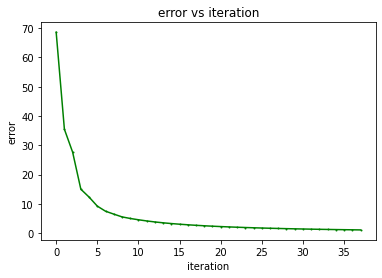

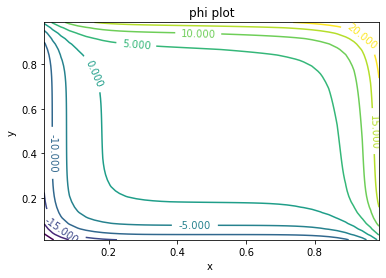

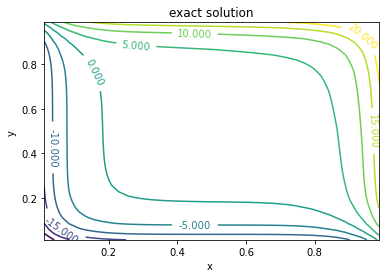

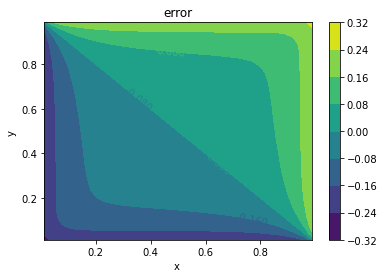

In [50]:
xn = 41        # internal grids
yn = 41        # internal grids

xnp2 = xn+2    # including ghost cells
ynp2 = yn+2    # including ghost cells
dh = 1/xn      # distance between each grid points

phin = np.zeros(shape=(xnp2,xnp2),dtype=float)           # initializing new phi
phi = np.zeros(shape=(xnp2,xnp2),dtype=float)            # initializing old phi
error = np.zeros(shape=(xnp2,xnp2),dtype=float)          # initializing error matrix
p = np.zeros(shape=(xnp2-2,xnp2-2),dtype=float)          # initializing exact solution
tol = 0.000001    #tolerance
e = 1             # initializing error value
k =0              # initializing iteration value
ersor41 = []      # initializing the error list
la = 1.2    # lambda value

b0x = lambda y :(0.25)*m.sinh(-5) + ((y-0.5)**2)*m.sinh(10*(y-0.5)) +1        # boundary condition at x =0
b1x = lambda y :(0.25)*m.sinh(5) + ((y-0.5)**2)*m.sinh(10*(y-0.5)) +m.exp(2*y) # boundary condition at x =1
b0y = lambda x :(0.25)*m.sinh(-5) + ((x-0.5)**2)*m.sinh(10*(x-0.5)) +1         # boundary condition at y = 0
b1y = lambda x :(0.25)*m.sinh(5) + ((x-0.5)**2)*m.sinh(10*(x-0.5)) +m.exp(2*x)  # boundary condition at y =1

#finding the s function
g = lambda x,y:2*m.sinh(10*(x-0.5)) + 40* (x-0.5)*m.cosh(10*(x-0.5)) \
                + 100*((x-0.5)**2)*m.sinh(10*(x-0.5)) \
                    + 2*m.sinh(10*(y-0.5))+40*(y-0.5)*m.cosh(10*(y-0.5)) \
                        + 100*((y-0.5)**2)*m.sinh(10*(y-0.5)) + 4*(x**2 + y**2)*m.exp(2*x*y)


while e>tol:       
    for j in range(1,xnp2-1):
        for i in range(1,xnp2-1): 
            # finding the x and y values at every grid points 
            #here the value of first grid is point is 0.5 times the dh and the rest of them are dh distance from the previous node
            x = 0.5*dh + (i-1)*dh     
            y = 0.5*dh + (j-1)*dh
            #SOR method
            phin[i,j] = la*(g(x,y)- (phin[i,j-1]/dh**2 + phin[i-1,j]/dh**2 + phi[i+1,j]/dh**2 + phi[i,j+1]/dh**2))/(-2*(2/dh**2)) + (1-la)*phi[i,j]                              

    for a in range(1,xnp2-1):
        #updating boundary conditions
        phin[a,0] = 2*b0x(0.5*dh + (a-1)*dh) - phi[a,1]
        phin[a,xn+1] = 2*b1x(0.5*dh + (a-1)*dh) - phi[a,xn]
        
    for b in range(1,xnp2-1):
        #updating boundary conditions
        phin[0,b] = 2*b0y(0.5*dh + (b-1)*dh) - phi[1,b]
        phin[xn+1,b] = 2*b1y(0.5*dh + (b-1)*dh) - phi[xn,b]
        
    #error using L2 norm    
    e = al.norm(phi[1:xnp2-1,1:ynp2-1]-phin[1:xnp2-1,1:ynp2-1],2)
    #storing the error value
    ersor41.append(e)    
    k = k+1
    #storing the value of phi to use in the next iteration
    phi = np.copy(phin)  
print('number of iterations:',k)    
     

#iteration plot
r = list(range(0,xn-3))  
plt.plot(r, ergs41[2:xn-1], color='green', marker='o', markerfacecolor='blue', markersize=1)  
plt.title('error vs iteration')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()   
    

# phi plot
xlist = np.linspace(0.5*dh, 1.0-1/(xn*2), xn)
ylist = np.linspace(0.5*dh, 1.0-1/(yn*2), yn)
x, y = np.meshgrid(xlist, ylist)
Z =phin[1:xnp2-1,1:ynp2-1]
lev = np.arange(-25,25,5)
fig,ax=plt.subplots(1,1)
phiplot = ax.contour(x, y, Z,levels=lev)
ax.clabel(phiplot, inline=True,fontsize=10)
ax.set_title('phi plot')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()        



# real value polt
p =( (x-0.5)**2 * np.sinh(10*(x-0.5))+(y-0.5)**2 * np.sinh(10*(y-0.5))+np.exp(2*x*y))
fig,ax=plt.subplots(1,1)
lev = np.arange(-25,25,5)
real = ax.contour(x, y, p,levels=lev)
ax.clabel(real, inline=True,fontsize=10)
plt.title('exact solution')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()   



#error plot
erro = p- phin[1:xnp2-1,1:ynp2-1]
fig,ax=plt.subplots(1,1)
lev = np.arange(-25,25)
errorplot = ax.contourf(x, y, erro)
fig.colorbar(errorplot)

ax.clabel(errorplot, inline=True,fontsize=10)
plt.title('error')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()


# RBPGS

total number of iterations: 3169


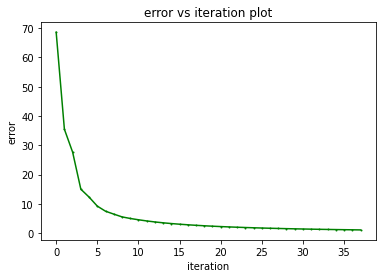

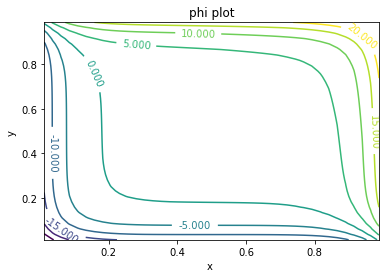

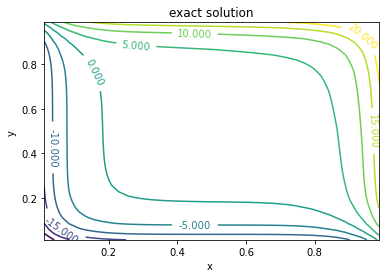

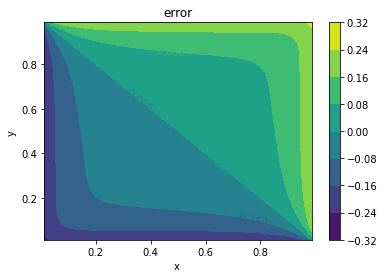

In [51]:
xn = 41        # internal grids
yn = 41        # internal grids

xnp2 = xn+2    # including ghost cells
ynp2 = yn+2    # including ghost cells
dh = 1/xn      # distance between each grid points

phin = np.zeros(shape=(xnp2,xnp2),dtype=float)           # initializing new phi
phi = np.zeros(shape=(xnp2,xnp2),dtype=float)            # initializing old phi
error = np.zeros(shape=(xnp2,xnp2),dtype=float)          # initializing error matrix
p = np.zeros(shape=(xnp2-2,xnp2-2),dtype=float)          # initializing exact solution
tol = 0.000001    #tolerance
e = 1             # initializing error value
k =0              # initializing iteration value
errb41 = []        # lambda value

b0x = lambda y :(0.25)*m.sinh(-5) + ((y-0.5)**2)*m.sinh(10*(y-0.5)) +1        # boundary condition at x =0
b1x = lambda y :(0.25)*m.sinh(5) + ((y-0.5)**2)*m.sinh(10*(y-0.5)) +m.exp(2*y) # boundary condition at x =1
b0y = lambda x :(0.25)*m.sinh(-5) + ((x-0.5)**2)*m.sinh(10*(x-0.5)) +1         # boundary condition at y = 0
b1y = lambda x :(0.25)*m.sinh(5) + ((x-0.5)**2)*m.sinh(10*(x-0.5)) +m.exp(2*x)  # boundary condition at y =1

#finding the s function

g = lambda x,y:2*m.sinh(10*(x-0.5)) + 40* (x-0.5)*m.cosh(10*(x-0.5)) \
                + 100*((x-0.5)**2)*m.sinh(10*(x-0.5)) \
                    + 2*m.sinh(10*(y-0.5))+40*(y-0.5)*m.cosh(10*(y-0.5)) \
                        + 100*((y-0.5)**2)*m.sinh(10*(y-0.5)) + 4*(x**2 + y**2)*m.exp(2*x*y)



while e>tol:
    
    

    for j in range(1,xnp2-1):
        # solving for red points
        if j%2 ==1:
            for i in range(1,xnp2-1,2):
                # finding the x and y values at every grid points 
                #here the value of first grid is point is 0.5 times the dh and the rest of them are dh distance from the previous node
                x = 0.5*dh + (i-1)*dh
                y = 0.5*dh + (j-1)*dh
                #using jacobi method for the red points
                phin[i,j] = (g(x,y)- (phi[i,j-1]/dh**2 + phi[i-1,j]/dh**2 + phi[i+1,j]/dh**2 + phi[i,j+1]/dh**2))/(-2*(2/dh**2))

               
        if j%2 ==0:
            for i in range(2,xnp2-1,2):
                x = 0.5*dh + (i-1)*dh
                y = 0.5*dh + (j-1)*dh
                #using jaconi for the red points
                phin[i,j] = (g(x,y)- (phi[i,j-1]/dh**2 + phi[i-1,j]/dh**2 + phi[i+1,j]/dh**2 + phi[i,j+1]/dh**2))/(-2*(2/dh**2))

   
    for j in range(1,xnp2-1):
        #solving for balck points
        if j%2 ==0:
            for i in range(1,xnp2-1,2):
                x = 0.5*dh + (i-1)*dh
                y = 0.5*dh + (j-1)*dh
                # using gauss scidel method for black points
                phin[i,j] = (g(x,y)- (phin[i,j-1]/dh**2 + phin[i-1,j]/dh**2 + phi[i+1,j]/dh**2 + phi[i,j+1]/dh**2))/(-2*(2/dh**2))

               
               
        if j%2 ==1:
            for i in range(2,xnp2-1,2):
                x = 0.5*dh + (i-1)*dh
                y = 0.5*dh + (j-1)*dh
                # using gauss scidel method for black points
                phin[i,j] = (g(x,y)- (phin[i,j-1]/dh**2 + phin[i-1,j]/dh**2 + phi[i+1,j]/dh**2 + phi[i,j+1]/dh**2))/(-2*(2/dh**2))

    for a in range(1,xnp2-1):
        #updating the boundary conditions
        phin[a,0] = 2*b0x(0.5*dh + (a-1)*dh) - phi[a,1]
        phin[a,xn+1] = 2*b1x(0.5*dh + (a-1)*dh) - phi[a,xn]
        
    for b in range(1,xnp2-1):
        #updating the boundary conditions
        phin[0,b] = 2*b0y(0.5*dh + (b-1)*dh) - phi[1,b]
        phin[xn+1,b] = 2*b1y(0.5*dh + (b-1)*dh) - phi[xn,b]
    #finding the error using L2 norm    
    e = al.norm(phi[1:xnp2-1,1:ynp2-1]-phin[1:xnp2-1,1:ynp2-1],2)
    #storing the error
    errb41.append(e)    

    #storing the phin in phi to use in next iteration
    phi = np.copy(phin)                 
    k = k+1          
            
print('total number of iterations:',k)   
#iteration plot
r = list(range(0,xn-3))  
plt.plot(r, ergs41[2:xn-1], color='green', marker='o', markerfacecolor='blue', markersize=1) 
plt.title('error vs iteration plot')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()   
   


# phi plot
xlist = np.linspace(0.5*dh, 1.0-1/(xn*2), xn)
ylist = np.linspace(0.5*dh, 1.0-1/(yn*2), yn)
x, y = np.meshgrid(xlist, ylist)
Z =phin[1:xnp2-1,1:ynp2-1]
lev = np.arange(-25,25,5)
fig,ax=plt.subplots(1,1)
phiplot = ax.contour(x, y, Z,levels=lev)
ax.clabel(phiplot, inline=True,fontsize=10)
ax.set_title('phi plot')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()        



# real value polt
p =( (x-0.5)**2 * np.sinh(10*(x-0.5))+(y-0.5)**2 * np.sinh(10*(y-0.5))+np.exp(2*x*y))
fig,ax=plt.subplots(1,1)
lev = np.arange(-25,25,5)
real = ax.contour(x, y, p,levels=lev)
ax.clabel(real, inline=True,fontsize=10)
plt.title('exact solution')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()   



#error plot
erro = p- phin[1:xnp2-1,1:ynp2-1]
fig,ax=plt.subplots(1,1)
lev = np.arange(-25,25)
errorplot = ax.contourf(x, y, erro)
fig.colorbar(errorplot)

ax.clabel(errorplot, inline=True,fontsize=10)
plt.title('error')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()


















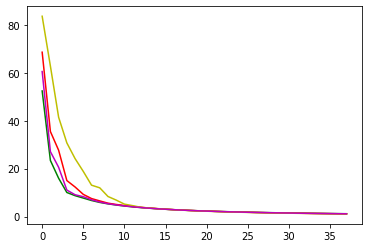

In [52]:
r = list(range(0,38)) 
plt.plot(r, erj41[2:40],color='g')
plt.plot(r, ergs41[2:40],color='r')
plt.plot(r, ersor41[2:40],color='y')
plt.plot(r, errb41[2:40],color='m')



From the above results it can be saif that the SOR plot converges faster than any other plots and then gauss seidel next 
RBPGS and then finally jacobi the number of steps are mentioned below:
1. SOR .............. 1524 ITERATIONS
2. GAUSS SEIDEL......2204 ITERATIONS
3. RBPGS.............3169 ITEARTIONS
4. JACOBI............4101 ITERATIONS

As jacobi is an explicit method it converges slower compared to others


# jacobi 81x81

total number of itetrations: 15107


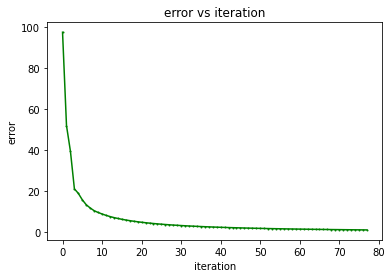

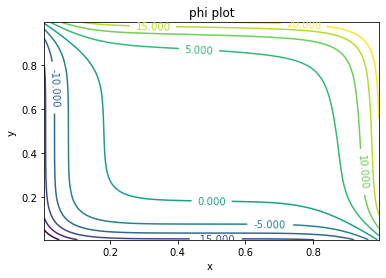

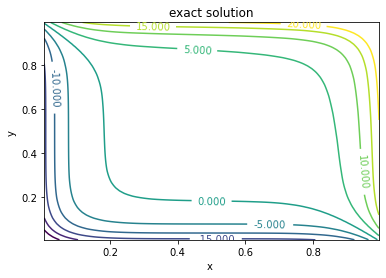

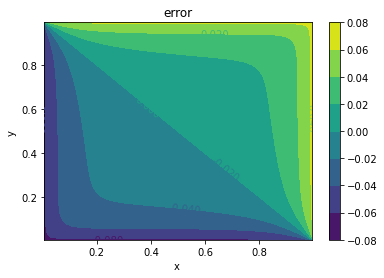

In [43]:
xn = 81       # internal grids
yn = 81        # internal grids

xnp2 = xn+2    # including ghost cells
ynp2 = yn+2    # including ghost cells
dh = 1/xn      # distance between each grid points

phin = np.zeros(shape=(xnp2,xnp2),dtype=float)           # initializing new phi
phi = np.zeros(shape=(xnp2,xnp2),dtype=float)            # initializing old phi
error = np.zeros(shape=(xnp2,xnp2),dtype=float)          # initializing error matrix
p = np.zeros(shape=(xnp2-2,xnp2-2),dtype=float)          # initializing exact solution
tol = 0.000001    #tolerance
e = 1             # initializing error value
k =0              # initializing iteration value
erj41 = []        # initializing error list

b0x = lambda y :(0.25)*m.sinh(-5) + ((y-0.5)**2)*m.sinh(10*(y-0.5)) +1        # boundary condition at x =0
b1x = lambda y :(0.25)*m.sinh(5) + ((y-0.5)**2)*m.sinh(10*(y-0.5)) +m.exp(2*y) # boundary condition at x =1
b0y = lambda x :(0.25)*m.sinh(-5) + ((x-0.5)**2)*m.sinh(10*(x-0.5)) +1         # boundary condition at y = 0
b1y = lambda x :(0.25)*m.sinh(5) + ((x-0.5)**2)*m.sinh(10*(x-0.5)) +m.exp(2*x)  # boundary condition at y =1
#finding the s function
g = lambda x,y:2*m.sinh(10*(x-0.5)) + 40* (x-0.5)*m.cosh(10*(x-0.5)) \
                + 100*((x-0.5)**2)*m.sinh(10*(x-0.5)) \
                    + 2*m.sinh(10*(y-0.5))+40*(y-0.5)*m.cosh(10*(y-0.5)) \
                        + 100*((y-0.5)**2)*m.sinh(10*(y-0.5)) + 4*(x**2 + y**2)*m.exp(2*x*y)
while e>tol:       
    for j in range(1,xnp2-1):
        for i in range(1,xnp2-1):
            # finding the x and y values at every grid points 
            #here the value of first grid is point is 0.5 times the dh and the rest of them are dh distance from the previous node
            x = 0.5*dh + (i-1)*dh        
            y = 0.5*dh + (j-1)*dh
            #  jacobi equation to solve the grid
            phin[i,j] = (g(x,y)- (phi[i,j-1]/dh**2 + phi[i-1,j]/dh**2 + phi[i+1,j]/dh**2 + phi[i,j+1]/dh**2))/(-2*(2/dh**2))

    for a in range(1,xnp2-1):
        #updating the ghost cells
        phin[a,0] = 2*b0x(0.5*dh + (a-1)*dh) - phi[a,1]
        phin[a,xn+1] = 2*b1x(0.5*dh + (a-1)*dh) - phi[a,xn]
        
    for b in range(1,xnp2-1):
        #updating the ghost cells
        phin[0,b] = 2*b0y(0.5*dh + (b-1)*dh) - phi[1,b]
        phin[xn+1,b] = 2*b1y(0.5*dh + (b-1)*dh) - phi[xn,b]
     # finding the error using the L2 norm   
    e = al.norm(phi[1:xnp2-1,1:ynp2-1]-phin[1:xnp2-1,1:ynp2-1],2)
    # storing the error values
    erj41.append(e)    
    k = k+1   
    # storing the phin in phi to use in the next iteration
    phi = np.copy(phin)  
print('total number of itetrations:',k)    
     

#iteration plot
r = list(range(0,xn-3))  
plt.plot(r, ergs41[2:xn-1], color='green', marker='o', markerfacecolor='blue', markersize=1) 
plt.title('error vs iteration')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()   
 

# phi plot
xlist = np.linspace(0.5*dh, 1.0-1/(xn*2), xn)
ylist = np.linspace(0.5*dh, 1.0-1/(yn*2), yn)
x, y = np.meshgrid(xlist, ylist)
Z =phin[1:xnp2-1,1:ynp2-1]
lev = np.arange(-25,25,5)
fig,ax=plt.subplots(1,1)
phiplot = ax.contour(x, y, Z,levels=lev)
ax.clabel(phiplot, inline=True,fontsize=10)
ax.set_title('phi plot')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()        



# real value polt
p =( (x-0.5)**2 * np.sinh(10*(x-0.5))+(y-0.5)**2 * np.sinh(10*(y-0.5))+np.exp(2*x*y))
fig,ax=plt.subplots(1,1)
lev = np.arange(-25,25,5)
real = ax.contour(x, y, p,levels=lev)
ax.clabel(real, inline=True,fontsize=10)
plt.title('exact solution')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()   



#error plot
erro = p- phin[1:xnp2-1,1:ynp2-1]
fig,ax=plt.subplots(1,1)
lev = np.arange(-25,25)
errorplot = ax.contourf(x, y, erro)
fig.colorbar(errorplot)

ax.clabel(errorplot, inline=True,fontsize=10)
plt.title('error')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()


# gauss seidel 81x81

total number of iterations:  8091


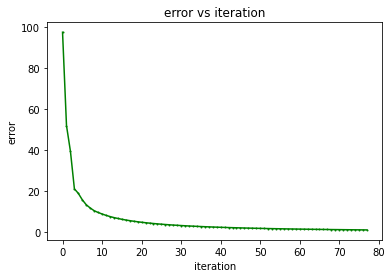

8091


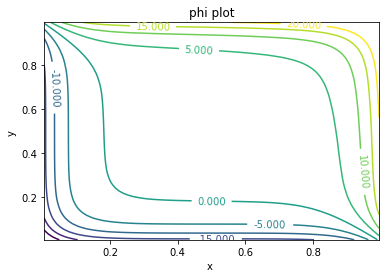

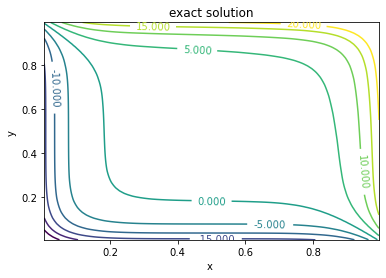

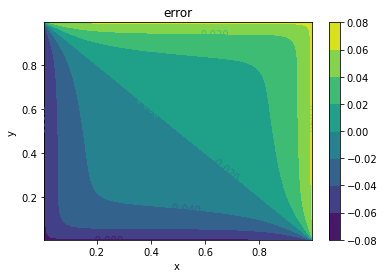

In [44]:
xn = 81        # internal grids
yn = 81        # internal grids

xnp2 = xn+2    # including ghost cells
ynp2 = yn+2    # including ghost cells
dh = 1/xn      # distance between each grid points

phin = np.zeros(shape=(xnp2,xnp2),dtype=float)           # initializing new phi
phi = np.zeros(shape=(xnp2,xnp2),dtype=float)            # initializing old phi
error = np.zeros(shape=(xnp2,xnp2),dtype=float)          # initializing error matrix
p = np.zeros(shape=(xnp2-2,xnp2-2),dtype=float)          # initializing exact solution
tol = 0.000001    #tolerance
e = 1             # initializing error value
k =0              # initializing iteration value
ergs41 = []       # initializing error list

b0x = lambda y :(0.25)*m.sinh(-5) + ((y-0.5)**2)*m.sinh(10*(y-0.5)) +1        # boundary condition at x =0
b1x = lambda y :(0.25)*m.sinh(5) + ((y-0.5)**2)*m.sinh(10*(y-0.5)) +m.exp(2*y) # boundary condition at x =1
b0y = lambda x :(0.25)*m.sinh(-5) + ((x-0.5)**2)*m.sinh(10*(x-0.5)) +1         # boundary condition at y = 0
b1y = lambda x :(0.25)*m.sinh(5) + ((x-0.5)**2)*m.sinh(10*(x-0.5)) +m.exp(2*x)  # boundary condition at y =1

#finding the s function
g = lambda x,y:2*m.sinh(10*(x-0.5)) + 40* (x-0.5)*m.cosh(10*(x-0.5)) \
                + 100*((x-0.5)**2)*m.sinh(10*(x-0.5)) \
                    + 2*m.sinh(10*(y-0.5))+40*(y-0.5)*m.cosh(10*(y-0.5)) \
                        + 100*((y-0.5)**2)*m.sinh(10*(y-0.5)) + 4*(x**2 + y**2)*m.exp(2*x*y)
while e>tol:       
    for j in range(1,xnp2-1):
        for i in range(1,xnp2-1):  
            # finding the x and y values at every grid points 
            #here the value of first grid is point is 0.5 times the dh and the rest of them are dh distance from the previous node
            x = 0.5*dh + (i-1)*dh
            y = 0.5*dh + (j-1)*dh
            # gauss scidel
            phin[i,j] = (g(x,y)- (phin[i,j-1]/dh**2 + phin[i-1,j]/dh**2 + phi[i+1,j]/dh**2 + phi[i,j+1]/dh**2))/(-2*(2/dh**2))

    for a in range(1,xnp2-1):
        #updating boundary coonditions
        phin[a,0] = 2*b0x(0.5*dh + (a-1)*dh) - phi[a,1]
        phin[a,xn+1] = 2*b1x(0.5*dh + (a-1)*dh) - phi[a,xn]
        
    for b in range(1,xnp2-1):
        #updating boundary conditions
        phin[0,b] = 2*b0y(0.5*dh + (b-1)*dh) - phi[1,b]
        phin[xn+1,b] = 2*b1y(0.5*dh + (b-1)*dh) - phi[xn,b]
     # finding the error using the L2 norm     
    e = al.norm(phi[1:xnp2-1,1:ynp2-1]-phin[1:xnp2-1,1:ynp2-1],2)
    #storing the error values
    ergs41.append(e)    
    k = k+1 
    #storing phin in phi to use in the next iteration
    phi = np.copy(phin)  
print('total number of iterations: ',k)    
     


#iteration plot

r = list(range(0,xn-3))  
plt.plot(r, ergs41[2:xn-1], color='green', marker='o', markerfacecolor='blue', markersize=1) 
plt.title('error vs iteration')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()   
   
print(k)   

# phi plot
xlist = np.linspace(0.5*dh, 1.0-1/(xn*2), xn)
ylist = np.linspace(0.5*dh, 1.0-1/(yn*2), yn)
x, y = np.meshgrid(xlist, ylist)
Z =phin[1:xnp2-1,1:ynp2-1]
lev = np.arange(-25,25,5)
fig,ax=plt.subplots(1,1)
phiplot = ax.contour(x, y, Z,levels=lev)
ax.clabel(phiplot, inline=True,fontsize=10)
ax.set_title('phi plot')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()        



# real value polt
p =( (x-0.5)**2 * np.sinh(10*(x-0.5))+(y-0.5)**2 * np.sinh(10*(y-0.5))+np.exp(2*x*y))
fig,ax=plt.subplots(1,1)
lev = np.arange(-25,25,5)
real = ax.contour(x, y, p,levels=lev)
ax.clabel(real, inline=True,fontsize=10)
plt.title('exact solution')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()   



#error plot
erro = p- phin[1:xnp2-1,1:ynp2-1]
fig,ax=plt.subplots(1,1)
lev = np.arange(-25,25)
errorplot = ax.contourf(x, y, erro)
fig.colorbar(errorplot)

ax.clabel(errorplot, inline=True,fontsize=10)
plt.title('error')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()



# SOR 81X81

number of iterations: 5596


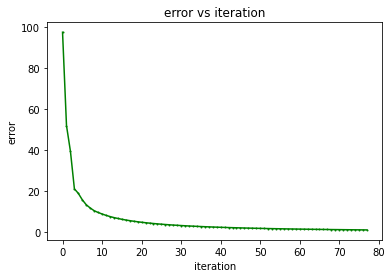

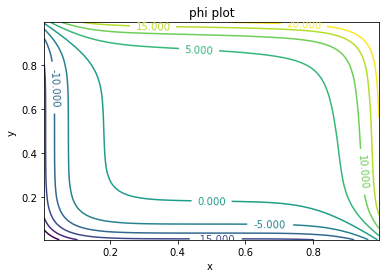

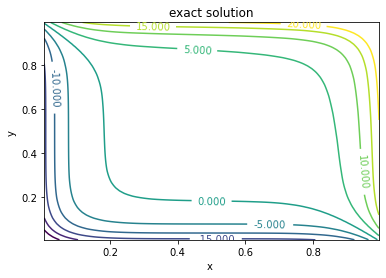

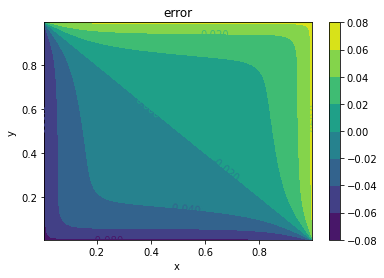

In [45]:
xn = 81        # internal grids
yn = 81        # internal grids

xnp2 = xn+2    # including ghost cells
ynp2 = yn+2    # including ghost cells
dh = 1/xn      # distance between each grid points

phin = np.zeros(shape=(xnp2,xnp2),dtype=float)           # initializing new phi
phi = np.zeros(shape=(xnp2,xnp2),dtype=float)            # initializing old phi
error = np.zeros(shape=(xnp2,xnp2),dtype=float)          # initializing error matrix
p = np.zeros(shape=(xnp2-2,xnp2-2),dtype=float)          # initializing exact solution
tol = 0.000001    #tolerance
e = 1             # initializing error value
k =0              # initializing iteration value
ersor41 = []      # initializing the error list
la = 1.2    # lambda value

b0x = lambda y :(0.25)*m.sinh(-5) + ((y-0.5)**2)*m.sinh(10*(y-0.5)) +1        # boundary condition at x =0
b1x = lambda y :(0.25)*m.sinh(5) + ((y-0.5)**2)*m.sinh(10*(y-0.5)) +m.exp(2*y) # boundary condition at x =1
b0y = lambda x :(0.25)*m.sinh(-5) + ((x-0.5)**2)*m.sinh(10*(x-0.5)) +1         # boundary condition at y = 0
b1y = lambda x :(0.25)*m.sinh(5) + ((x-0.5)**2)*m.sinh(10*(x-0.5)) +m.exp(2*x)  # boundary condition at y =1

#finding the s function
g = lambda x,y:2*m.sinh(10*(x-0.5)) + 40* (x-0.5)*m.cosh(10*(x-0.5)) \
                + 100*((x-0.5)**2)*m.sinh(10*(x-0.5)) \
                    + 2*m.sinh(10*(y-0.5))+40*(y-0.5)*m.cosh(10*(y-0.5)) \
                        + 100*((y-0.5)**2)*m.sinh(10*(y-0.5)) + 4*(x**2 + y**2)*m.exp(2*x*y)


while e>tol:       
    for j in range(1,xnp2-1):
        for i in range(1,xnp2-1): 
            # finding the x and y values at every grid points 
            #here the value of first grid is point is 0.5 times the dh and the rest of them are dh distance from the previous node
            x = 0.5*dh + (i-1)*dh     
            y = 0.5*dh + (j-1)*dh
            #SOR method
            phin[i,j] = la*(g(x,y)- (phin[i,j-1]/dh**2 + phin[i-1,j]/dh**2 + phi[i+1,j]/dh**2 + phi[i,j+1]/dh**2))/(-2*(2/dh**2)) + (1-la)*phi[i,j]                              

    for a in range(1,xnp2-1):
        #updating boundary conditions
        phin[a,0] = 2*b0x(0.5*dh + (a-1)*dh) - phi[a,1]
        phin[a,xn+1] = 2*b1x(0.5*dh + (a-1)*dh) - phi[a,xn]
        
    for b in range(1,xnp2-1):
        #updating boundary conditions
        phin[0,b] = 2*b0y(0.5*dh + (b-1)*dh) - phi[1,b]
        phin[xn+1,b] = 2*b1y(0.5*dh + (b-1)*dh) - phi[xn,b]
        
    #error using L2 norm    
    e = al.norm(phi[1:xnp2-1,1:ynp2-1]-phin[1:xnp2-1,1:ynp2-1],2)
    #storing the error value
    ersor41.append(e)    
    k = k+1
    #storing the value of phi to use in the next iteration
    phi = np.copy(phin)  
print('number of iterations:',k)    
     

#iteration plot
r = list(range(0,xn-3))  
plt.plot(r, ergs81[2:xn-1], color='green', marker='o', markerfacecolor='blue', markersize=1)  
plt.title('error vs iteration')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()   
    

# phi plot
xlist = np.linspace(0.5*dh, 1.0-1/(xn*2), xn)
ylist = np.linspace(0.5*dh, 1.0-1/(yn*2), yn)
x, y = np.meshgrid(xlist, ylist)
Z =phin[1:xnp2-1,1:ynp2-1]
lev = np.arange(-25,25,5)
fig,ax=plt.subplots(1,1)
phiplot = ax.contour(x, y, Z,levels=lev)
ax.clabel(phiplot, inline=True,fontsize=10)
ax.set_title('phi plot')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()        



# real value polt
p =( (x-0.5)**2 * np.sinh(10*(x-0.5))+(y-0.5)**2 * np.sinh(10*(y-0.5))+np.exp(2*x*y))
fig,ax=plt.subplots(1,1)
lev = np.arange(-25,25,5)
real = ax.contour(x, y, p,levels=lev)
ax.clabel(real, inline=True,fontsize=10)
plt.title('exact solution')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()   



#error plot
erro = p- phin[1:xnp2-1,1:ynp2-1]
fig,ax=plt.subplots(1,1)
lev = np.arange(-25,25)
errorplot = ax.contourf(x, y, erro)
fig.colorbar(errorplot)

ax.clabel(errorplot, inline=True,fontsize=10)
plt.title('error')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()

# RBPGS 81X81

total number of iterations: 11657


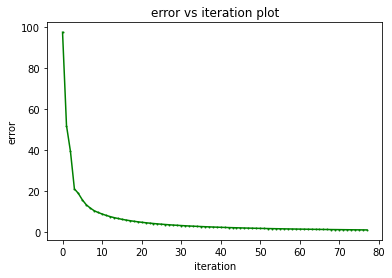

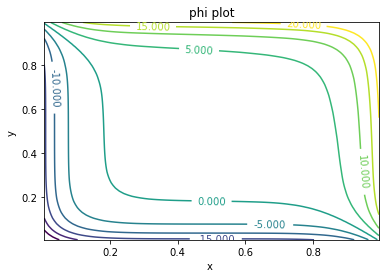

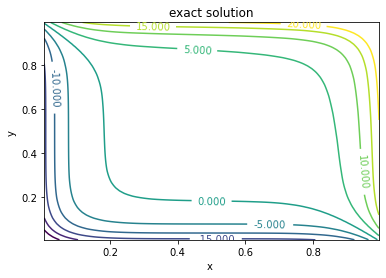

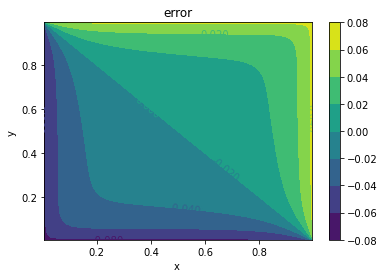

In [47]:
xn = 81        # internal grids
yn = 81        # internal grids

xnp2 = xn+2    # including ghost cells
ynp2 = yn+2    # including ghost cells
dh = 1/xn      # distance between each grid points

phin = np.zeros(shape=(xnp2,xnp2),dtype=float)           # initializing new phi
phi = np.zeros(shape=(xnp2,xnp2),dtype=float)            # initializing old phi
error = np.zeros(shape=(xnp2,xnp2),dtype=float)          # initializing error matrix
p = np.zeros(shape=(xnp2-2,xnp2-2),dtype=float)          # initializing exact solution
tol = 0.000001    #tolerance
e = 1             # initializing error value
k =0              # initializing iteration value
errb41 = []        # lambda value

b0x = lambda y :(0.25)*m.sinh(-5) + ((y-0.5)**2)*m.sinh(10*(y-0.5)) +1        # boundary condition at x =0
b1x = lambda y :(0.25)*m.sinh(5) + ((y-0.5)**2)*m.sinh(10*(y-0.5)) +m.exp(2*y) # boundary condition at x =1
b0y = lambda x :(0.25)*m.sinh(-5) + ((x-0.5)**2)*m.sinh(10*(x-0.5)) +1         # boundary condition at y = 0
b1y = lambda x :(0.25)*m.sinh(5) + ((x-0.5)**2)*m.sinh(10*(x-0.5)) +m.exp(2*x)  # boundary condition at y =1

#finding the s function

g = lambda x,y:2*m.sinh(10*(x-0.5)) + 40* (x-0.5)*m.cosh(10*(x-0.5)) \
                + 100*((x-0.5)**2)*m.sinh(10*(x-0.5)) \
                    + 2*m.sinh(10*(y-0.5))+40*(y-0.5)*m.cosh(10*(y-0.5)) \
                        + 100*((y-0.5)**2)*m.sinh(10*(y-0.5)) + 4*(x**2 + y**2)*m.exp(2*x*y)



while e>tol:
    
    

    for j in range(1,xnp2-1):
        # solving for red points
        if j%2 ==1:
            for i in range(1,xnp2-1,2):
                # finding the x and y values at every grid points 
                #here the value of first grid is point is 0.5 times the dh and the rest of them are dh distance from the previous node
                x = 0.5*dh + (i-1)*dh
                y = 0.5*dh + (j-1)*dh
                #using jacobi method for the red points
                phin[i,j] = (g(x,y)- (phi[i,j-1]/dh**2 + phi[i-1,j]/dh**2 + phi[i+1,j]/dh**2 + phi[i,j+1]/dh**2))/(-2*(2/dh**2))

               
        if j%2 ==0:
            for i in range(2,xnp2-1,2):
                x = 0.5*dh + (i-1)*dh
                y = 0.5*dh + (j-1)*dh
                #using jaconi for the red points
                phin[i,j] = (g(x,y)- (phi[i,j-1]/dh**2 + phi[i-1,j]/dh**2 + phi[i+1,j]/dh**2 + phi[i,j+1]/dh**2))/(-2*(2/dh**2))

   
    for j in range(1,xnp2-1):
        #solving for balck points
        if j%2 ==0:
            for i in range(1,xnp2-1,2):
                x = 0.5*dh + (i-1)*dh
                y = 0.5*dh + (j-1)*dh
                # using gauss scidel method for black points
                phin[i,j] = (g(x,y)- (phin[i,j-1]/dh**2 + phin[i-1,j]/dh**2 + phi[i+1,j]/dh**2 + phi[i,j+1]/dh**2))/(-2*(2/dh**2))

               
               
        if j%2 ==1:
            for i in range(2,xnp2-1,2):
                x = 0.5*dh + (i-1)*dh
                y = 0.5*dh + (j-1)*dh
                # using gauss scidel method for black points
                phin[i,j] = (g(x,y)- (phin[i,j-1]/dh**2 + phin[i-1,j]/dh**2 + phi[i+1,j]/dh**2 + phi[i,j+1]/dh**2))/(-2*(2/dh**2))

    for a in range(1,xnp2-1):
        #updating the boundary conditions
        phin[a,0] = 2*b0x(0.5*dh + (a-1)*dh) - phi[a,1]
        phin[a,xn+1] = 2*b1x(0.5*dh + (a-1)*dh) - phi[a,xn]
        
    for b in range(1,xnp2-1):
        #updating the boundary conditions
        phin[0,b] = 2*b0y(0.5*dh + (b-1)*dh) - phi[1,b]
        phin[xn+1,b] = 2*b1y(0.5*dh + (b-1)*dh) - phi[xn,b]
    #finding the error using L2 norm    
    e = al.norm(phi[1:xnp2-1,1:ynp2-1]-phin[1:xnp2-1,1:ynp2-1],2)
    #storing the error
    errb41.append(e)    

    #storing the phin in phi to use in next iteration
    phi = np.copy(phin)                 
    k = k+1          
            
print('total number of iterations:',k)   
#iteration plot
r = list(range(0,xn-3))  
plt.plot(r, ergs41[2:xn-1], color='green', marker='o', markerfacecolor='blue', markersize=1) 
plt.title('error vs iteration plot')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()   
   


# phi plot
xlist = np.linspace(0.5*dh, 1.0-1/(xn*2), xn)
ylist = np.linspace(0.5*dh, 1.0-1/(yn*2), yn)
x, y = np.meshgrid(xlist, ylist)
Z =phin[1:xnp2-1,1:ynp2-1]
lev = np.arange(-25,25,5)
fig,ax=plt.subplots(1,1)
phiplot = ax.contour(x, y, Z,levels=lev)
ax.clabel(phiplot, inline=True,fontsize=10)
ax.set_title('phi plot')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()        



# real value polt
p =( (x-0.5)**2 * np.sinh(10*(x-0.5))+(y-0.5)**2 * np.sinh(10*(y-0.5))+np.exp(2*x*y))
fig,ax=plt.subplots(1,1)
lev = np.arange(-25,25,5)
real = ax.contour(x, y, p,levels=lev)
ax.clabel(real, inline=True,fontsize=10)
plt.title('exact solution')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()   



#error plot
erro = p- phin[1:xnp2-1,1:ynp2-1]
fig,ax=plt.subplots(1,1)
lev = np.arange(-25,25)
errorplot = ax.contourf(x, y, erro)
fig.colorbar(errorplot)

ax.clabel(errorplot, inline=True,fontsize=10)
plt.title('error')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()




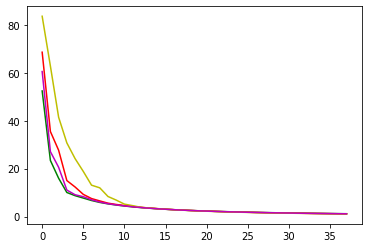

In [53]:
r = list(range(0,38)) 
plt.plot(r, erj41[2:40],color='g')
plt.plot(r, ergs41[2:40],color='r')
plt.plot(r, ersor41[2:40],color='y')
plt.plot(r, errb41[2:40],color='m')


similar trend is seen the 81 x81 grid